In [1]:
import pmdarima as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

In [2]:
data = pd.read_excel("data/jobGrowthByQuarter.xlsx")

In [3]:
data.shape

(24, 2)

In [4]:
data.head()

,Year & Quarter,Jobs Filled
0,2015-Q1,418
1,2015-Q2,100
2,2015-Q3,117
3,2015-Q4,140
4,2016-Q1,778


In [5]:
data["Log Jobs Filled"] = np.log(data["Jobs Filled"])

In [6]:
data.head()

,Year & Quarter,Jobs Filled,Log Jobs Filled
0,2015-Q1,418,6.035481
1,2015-Q2,100,4.605170
2,2015-Q3,117,4.762174
3,2015-Q4,140,4.941642
4,2016-Q1,778,6.656727


In [7]:
train, test = data.iloc[:16,:], data.iloc[16:,:]

In [8]:
model1 = pm.auto_arima(train['Jobs Filled'],
                      trace=True,
                      suppress_warnings=True,
                      seasonal=True, m=4)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[4] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=168.735, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=169.953, Time=0.07 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=171.201, Time=0.07 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=173.131, Time=0.01 sec
 ARIMA(0,0,0)(1,1,0)[4] intercept   : AIC=167.953, Time=0.05 sec
 ARIMA(0,0,0)(2,1,0)[4] intercept   : AIC=169.716, Time=0.09 sec
 ARIMA(0,0,0)(1,1,1)[4] intercept   : AIC=169.707, Time=0.09 sec
 ARIMA(0,0,0)(0,1,1)[4] intercept   : AIC=169.321, Time=0.05 sec
 ARIMA(0,0,0)(2,1,1)[4] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,1)(1,1,0)[4] intercept   : AIC=169.953, Time=0.08 sec
 ARIMA(1,0,1)(1,1,0)[4] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(1,1,0)[4]             : AIC=168.603, Time=0.02 sec

Best model:  ARIMA(0,0,0)(1,1,0)[4] intercept
Total fit time: 0.982 seconds


In [9]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:                       y   No. Observations:                   16
Model:             SARIMAX(1, 1, 0, 4)   Log Likelihood                 -80.977
Date:                 Mon, 29 Mar 2021   AIC                            167.953
Time:                         13:07:40   BIC                            169.408
Sample:                              0   HQIC                           167.415
                                  - 16                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     76.9744    227.938      0.338      0.736    -369.777     523.725
ar.S.L4        0.6336      0.924      0.686      0.493      -1.178       2.445
sigma2      3.655e+04   1.63e+04      2.246      0.025    4655.324    6.84e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                18.15
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               5.72   Skew:                             2.18
Prob(H) (two-sided):                  0.12   Kurtosis:                         7.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
model2Log = pm.auto_arima(train['Log Jobs Filled'],
                      trace=True,
                      suppress_warnings=True,
                      seasonal=True, m=4)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[4] intercept   : AIC=-1.581, Time=0.22 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=-7.453, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=-3.929, Time=0.05 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=-4.154, Time=0.21 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=16.621, Time=0.01 sec
 ARIMA(0,0,0)(1,1,0)[4] intercept   : AIC=-5.918, Time=0.04 sec
 ARIMA(0,0,0)(0,1,1)[4] intercept   : AIC=-6.066, Time=0.03 sec
 ARIMA(0,0,0)(1,1,1)[4] intercept   : AIC=-4.070, Time=0.09 sec
 ARIMA(1,0,0)(0,1,0)[4] intercept   : AIC=-5.466, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[4] intercept   : AIC=-5.466, Time=0.03 sec
 ARIMA(1,0,1)(0,1,0)[4] intercept   : AIC=inf, Time=0.12 sec

Best model:  ARIMA(0,0,0)(0,1,0)[4] intercept
Total fit time: 0.840 seconds


In [11]:
model2Log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:                       y   No. Observations:                   16
Model:             SARIMAX(0, 1, 0, 4)   Log Likelihood                   5.727
Date:                 Mon, 29 Mar 2021   AIC                             -7.453
Time:                         13:07:41   BIC                             -6.483
Sample:                              0   HQIC                            -7.812
                                  - 16                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4189      0.047      8.839      0.000       0.326       0.512
sigma2         0.0225      0.014      1.564      0.118      -0.006       0.051
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.84
Prob(Q):                              0.91   Prob(JB):                         0.66
Heteroskedasticity (H):               1.37   Skew:                             0.40
Prob(H) (two-sided):                  0.77   Kurtosis:                         1.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
nTest = len(test)

In [13]:
test_pred, confint = model1.predict(n_periods=nTest, return_conf_int=True)

C:\Users\skyst\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


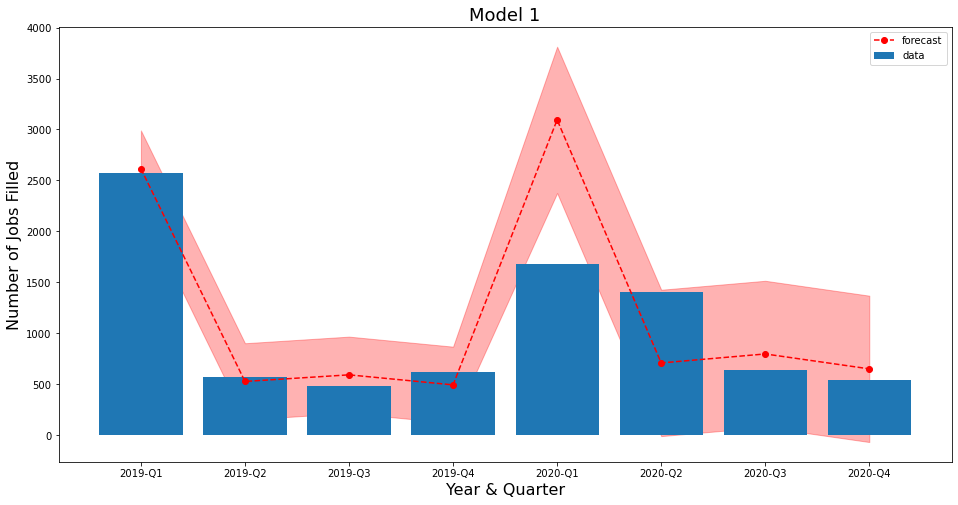

In [14]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.bar(test.index, test['Jobs Filled'], label='data')
#ax.plot(test.index, test['Jobs Filled'], '--', marker='o', label='data')
ax.plot(test.index, test_pred, '--', marker='o', color='red', label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.set_xticklabels([0] + list(test["Year & Quarter"]))
plt.title("Model 1", fontsize = 18)
plt.xlabel("Year & Quarter", fontsize=16)
plt.ylabel("Number of Jobs Filled", fontsize=16)
ax.legend();

C:\Users\skyst\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


Text(0, 0.5, 'Number of Jobs Filled')

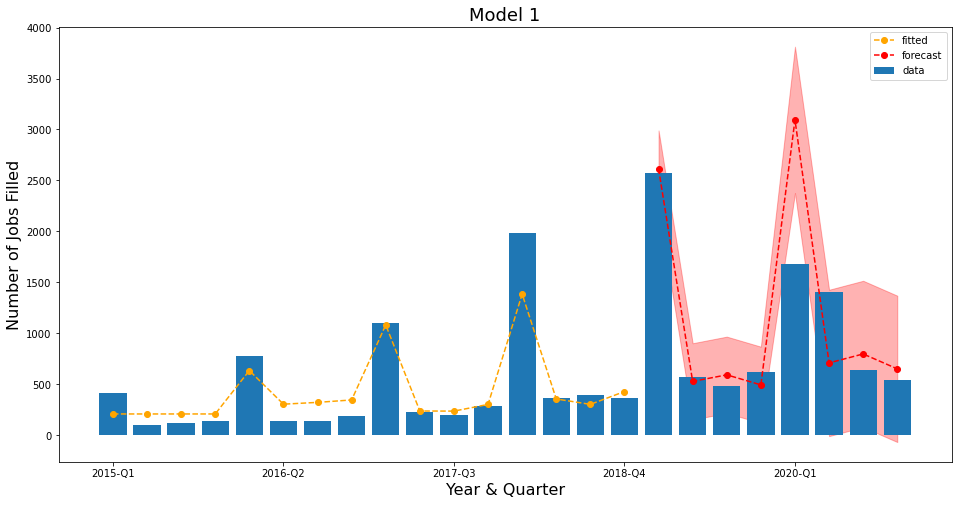

In [15]:
train_pred = model1.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(16, 8))
#ax.plot(data.index, data['Jobs Filled'], '--', marker='o', label='data')
ax.bar(data.index, data['Jobs Filled'], label='data')
ax.plot(train.index, train_pred, '--', marker='o', color='orange', label='fitted')
ax.plot(test.index, test_pred, '--', marker='o', color='red', label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
a = ax.get_xticks().tolist()
x = [ data["Year & Quarter"].iloc[int(a[i])] for i in range(0,len(a)-1) ]
ax.set_xticklabels(x)
ax.legend();
plt.title("Model 1", fontsize=18)
plt.xlabel("Year & Quarter", fontsize=16)
plt.ylabel("Number of Jobs Filled", fontsize=16)

In [16]:
### forecast RMSE
def rmse(t, y):
  return np.sqrt(np.mean((t - y)**2))

In [17]:
print("Train set RMSE:", rmse(train['Jobs Filled'], train_pred))
print("Validation set RMSE:", rmse(test['Jobs Filled'][:4], test_pred[:4]))
print("Test set RMSE:", rmse(test['Jobs Filled'][-4:], test_pred[-4:]))

Train set RMSE: 184.22420456221136
Validation set RMSE: 87.19719228005857
Test set RMSE: 792.043938971788


In [18]:
pred = int(sum(test_pred[:4].round()))
actual = sum(test["Jobs Filled"][:4])
print("Predicted number of jobs created in 2019: ", pred )
print("Actual number of jobs created in 2019: ", actual )
print("Model is off by: ", round(100*(pred - actual) / actual,1), "% of the actual number of jobs created.")
print(" ")

pred = int(sum(test_pred[-4:].round()))
actual = sum(test["Jobs Filled"][-4:])
print("Predicted number of jobs created in 2020: ", pred )
print("Actual number of jobs created in 2020: ", actual )
print("Model is off by: ", round(100*(pred - actual) / actual,1), "% of the actual number of jobs created.")
print(" ")

Predicted number of jobs created in 2019:  4234
Actual number of jobs created in 2019:  4259
Model is off by:  -0.6 % of the actual number of jobs created.
 
Predicted number of jobs created in 2020:  5256
Actual number of jobs created in 2020:  4273
Model is off by:  23.0 % of the actual number of jobs created.
 


In [19]:
test_pred, confint = model2Log.predict(n_periods=nTest, return_conf_int=True)

C:\Users\skyst\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


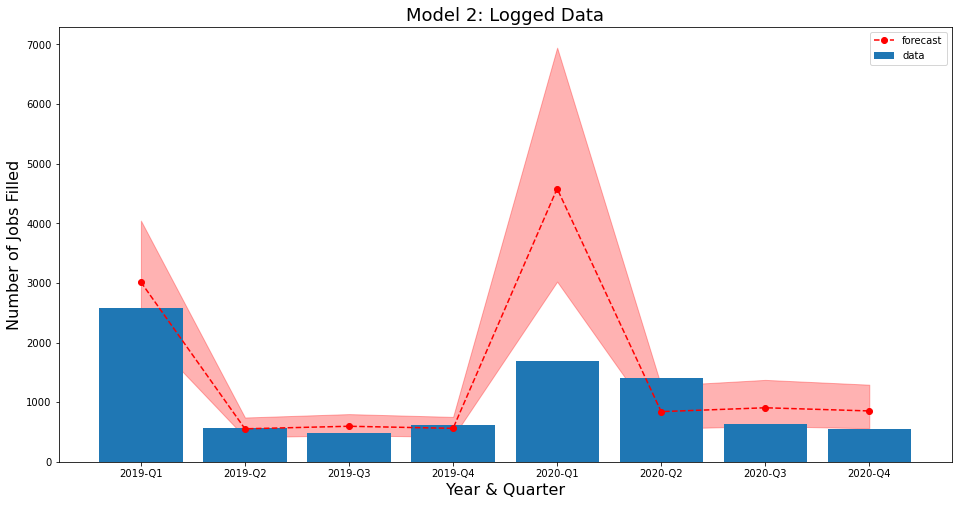

In [20]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.bar(test.index, np.exp(test['Log Jobs Filled']), label='data')
#ax.plot(test.index, test['Jobs Filled'], '--', marker='o', label='data')
ax.plot(test.index, np.exp(test_pred), '--', marker='o', color='red', label='forecast')
ax.fill_between(test.index, \
                np.exp(confint[:,0]), np.exp(confint[:,1]), \
                color='red', alpha=0.3)
ax.set_xticklabels([0] + list(test["Year & Quarter"]))
plt.title("Model 2: Logged Data", fontsize=18)
plt.xlabel("Year & Quarter", fontsize=16)
plt.ylabel("Number of Jobs Filled", fontsize=16)
ax.legend();

C:\Users\skyst\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


Text(0, 0.5, 'Number of Jobs Filled')

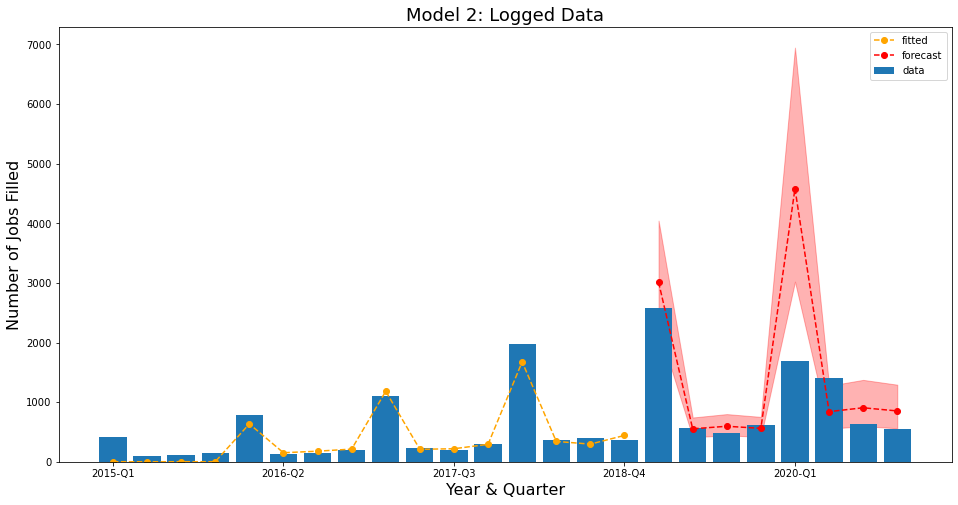

In [21]:
train_pred = model2Log.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(16, 8))
#ax.plot(data.index, data['Jobs Filled'], '--', marker='o', label='data')
ax.bar(data.index, np.exp(data['Log Jobs Filled']), label='data')
ax.plot(train.index, np.exp(train_pred), '--', marker='o', color='orange', label='fitted')
ax.plot(test.index, np.exp(test_pred), '--', marker='o', color='red', label='forecast')
ax.fill_between(test.index, \
                np.exp(confint[:,0]), np.exp(confint[:,1]), \
                color='red', alpha=0.3)
a = ax.get_xticks().tolist()
x = [ data["Year & Quarter"].iloc[int(a[i])] for i in range(0,len(a)-1) ]
ax.set_xticklabels(x)
ax.legend();
plt.title("Model 2: Logged Data", fontsize=18)
plt.xlabel("Year & Quarter", fontsize=16)
plt.ylabel("Number of Jobs Filled", fontsize=16)

In [22]:
print("Train set RMSE:", rmse(np.exp(train['Log Jobs Filled']), np.exp(train_pred)))
print("Validation set RMSE:", rmse(np.exp(test['Log Jobs Filled'][:4]), np.exp(test_pred[:4])))
print("Test set RMSE:", rmse(np.exp(test['Log Jobs Filled'][-4:]), np.exp(test_pred[-4:])))

Train set RMSE: 148.53526061272342
Validation set RMSE: 226.8685834501475
Test set RMSE: 1489.4303414779777


In [23]:
pred = int(sum(np.exp(test_pred[:4])).round())
actual = sum(np.exp(test["Log Jobs Filled"][:4]))
print("Predicted number of jobs created in 2019: ", pred )
print("Actual number of jobs created in 2019: ", actual )
print("Model is off by: ", round(100*(pred - actual) / actual,1), "% of the actual number of jobs created.")
print(" ")

pred = int(sum(np.exp(test_pred[-4:]).round()))
actual = sum(test["Jobs Filled"][-4:])
print("Predicted number of jobs created in 2020: ", pred )
print("Actual number of jobs created in 2020: ", actual )
print("Model is off by: ", round(100*(pred - actual) / actual,1), "% of the actual number of jobs created.")
print(" ")

Predicted number of jobs created in 2019:  4723
Actual number of jobs created in 2019:  4259.0
Model is off by:  10.9 % of the actual number of jobs created.
 
Predicted number of jobs created in 2020:  7181
Actual number of jobs created in 2020:  4273
Model is off by:  68.1 % of the actual number of jobs created.
 


In [24]:
train, test = data.iloc[:20,:], data.iloc[20:,:]

In [25]:
train

,Year & Quarter,Jobs Filled,Log Jobs Filled
0,2015-Q1,418,6.035481
1,2015-Q2,100,4.605170
2,2015-Q3,117,4.762174
3,2015-Q4,140,4.941642
4,2016-Q1,778,6.656727
5,2016-Q2,138,4.927254
6,2016-Q3,144,4.969813
7,2016-Q4,193,5.262690
8,2017-Q1,1103,7.005789
9,2017-Q2,225,5.416100


In [26]:
model1.update(train['Jobs Filled'][-4:])

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(1, 1, 0, 4),
      suppress_warnings=True)

In [27]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:                       y   No. Observations:                   20
Model:             SARIMAX(1, 1, 0, 4)   Log Likelihood                -106.072
Date:                 Mon, 29 Mar 2021   AIC                            218.144
Time:                         13:07:42   BIC                            220.462
Sample:                              0   HQIC                           218.262
                                  - 20                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     76.9812    197.692      0.389      0.697    -310.488     464.451
ar.S.L4        0.6189      0.851      0.728      0.467      -1.048       2.286
sigma2      3.654e+04   1.64e+04      2.224      0.026    4331.302    6.87e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                35.50
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                             2.33
Prob(H) (two-sided):                  0.49   Kurtosis:                         8.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
nTest = len(test)
test_pred, confint = model1.predict(n_periods=nTest, return_conf_int=True)

C:\Users\skyst\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


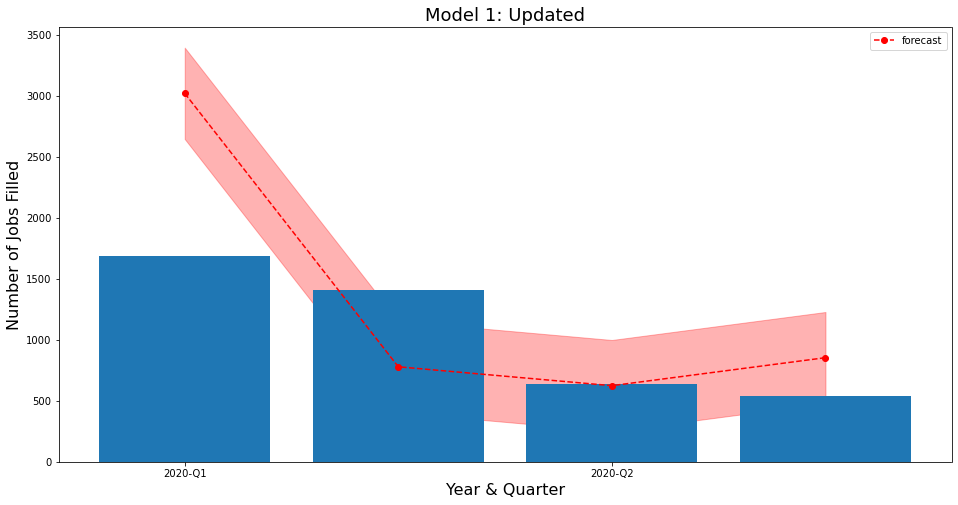

In [29]:
fig, ax = plt.subplots(figsize=(16, 8))
#ax.plot(test.index, test['Jobs Filled'], '--', marker='o', label='data')
ax.bar(test.index, test['Jobs Filled'])
ax.plot(test.index, test_pred, '--', marker='o', color='red', label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
plt.locator_params(axis='x', nbins=3)
ax.set_xticklabels([0] + list(test["Year & Quarter"]))
plt.title("Model 1: Updated", fontsize=18)
plt.xlabel("Year & Quarter", fontsize=16)
plt.ylabel("Number of Jobs Filled", fontsize=16)
ax.legend();

C:\Users\skyst\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


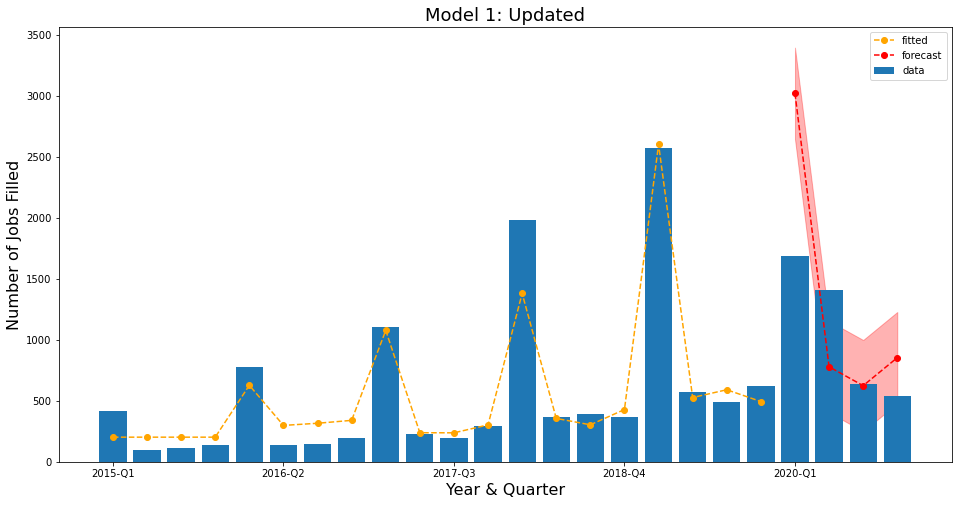

In [30]:
train_pred = model1.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(16, 8))
#ax.plot(data.index, data['Jobs Filled'],'--', marker='o', label='data')
ax.bar(data.index, data['Jobs Filled'], label='data')
ax.plot(train.index, train_pred,'--', marker='o', color='orange', label='fitted')
ax.plot(test.index, test_pred,'--', marker='o', color='red', label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
a = ax.get_xticks().tolist()
x = [ data["Year & Quarter"].iloc[int(a[i])] for i in range(0,len(a)-1) ]
ax.set_xticklabels(x)
plt.title("Model 1: Updated", fontsize=18)
plt.xlabel("Year & Quarter", fontsize=16)
plt.ylabel("Number of Jobs Filled", fontsize=16)
ax.legend();

In [31]:
print("Train set RMSE:", rmse(train['Jobs Filled'], train_pred))
print("Old Validation set RMSE:", rmse(train['Jobs Filled'][-4:], train_pred[-4:]))
print("Test set RMSE:", rmse(test['Jobs Filled'][-4:], test_pred[-4:]))

Train set RMSE: 169.17895889987676
Old Validation set RMSE: 85.80056717314129
Test set RMSE: 754.9394418929999


In [32]:
pred = int(sum(test_pred.round()))
actual = sum(test["Jobs Filled"])
print("Predicted number of jobs created in 2020: ", pred )
print("Actual number of jobs created in 2020: ", actual )
print("Model is off by", round(100*(pred - actual) / actual,1), "% of the actual number of jobs created.")

Predicted number of jobs created in 2020:  5279
Actual number of jobs created in 2020:  4273
Model is off by 23.5 % of the actual number of jobs created.


In [33]:
model2Log = pm.auto_arima(train['Log Jobs Filled'],
                      trace=True,
                      suppress_warnings=True,
                      seasonal=True, m=4)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[4] intercept   : AIC=-7.471, Time=0.26 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=-12.056, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=-11.772, Time=0.12 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=-11.993, Time=0.08 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=20.461, Time=0.01 sec
 ARIMA(0,0,0)(1,1,0)[4] intercept   : AIC=-13.683, Time=0.07 sec
 ARIMA(0,0,0)(2,1,0)[4] intercept   : AIC=-11.895, Time=0.08 sec
 ARIMA(0,0,0)(1,1,1)[4] intercept   : AIC=-11.921, Time=0.12 sec
 ARIMA(0,0,0)(0,1,1)[4] intercept   : AIC=-13.771, Time=0.03 sec
 ARIMA(0,0,0)(0,1,2)[4] intercept   : AIC=-11.906, Time=0.05 sec
 ARIMA(0,0,0)(1,1,2)[4] intercept   : AIC=-9.921, Time=0.06 sec
 ARIMA(1,0,0)(0,1,1)[4] intercept   : AIC=-11.842, Time=0.06 sec
 ARIMA(1,0,1)(0,1,1)[4] intercept   : AIC=-11.165, Time=0.14 sec
 ARIMA(0,0,0)(0,1,1)[4]             : AIC=15.247, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,1,1)[4] intercept
Tota

In [34]:
model2Log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                   20
Model:             SARIMAX(0, 1, [1], 4)   Log Likelihood                   9.886
Date:                   Mon, 29 Mar 2021   AIC                            -13.771
Time:                           13:07:43   BIC                            -11.454
Sample:                                0   HQIC                           -13.653
                                    - 20                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4123      0.021     19.315      0.000       0.370       0.454
ma.S.L4       -0.6170      0.462     -1.334      0.182      -1.523       0.289
sigma2         0.0151      0.008      1.858      0.063      -0.001       0.031
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.77
Prob(Q):                              0.97   Prob(JB):                         0.68
Heteroskedasticity (H):               0.75   Skew:                             0.08
Prob(H) (two-sided):                  0.76   Kurtosis:                         1.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
nTest = len(test)
test_pred, confint = model2Log.predict(n_periods=nTest, return_conf_int=True)

C:\Users\skyst\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


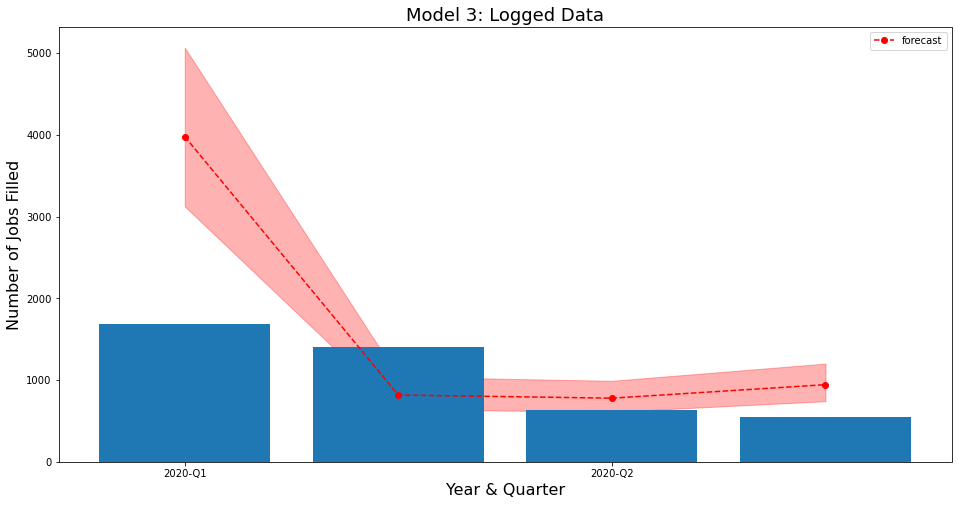

In [36]:
fig, ax = plt.subplots(figsize=(16, 8))
#ax.plot(test.index, test['Jobs Filled'], '--', marker='o', label='data')
ax.bar(test.index, np.exp(test['Log Jobs Filled']))
ax.plot(test.index, np.exp(test_pred), '--', marker='o', color='red', label='forecast')
ax.fill_between(test.index, \
                np.exp(confint[:,0]), np.exp(confint[:,1]), \
                color='red', alpha=0.3)
plt.locator_params(axis='x', nbins=3)
ax.set_xticklabels([0] + list(test["Year & Quarter"]))
plt.title("Model 3: Logged Data", fontsize=18)
plt.xlabel("Year & Quarter", fontsize=16)
plt.ylabel("Number of Jobs Filled", fontsize=16)
ax.legend();

C:\Users\skyst\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


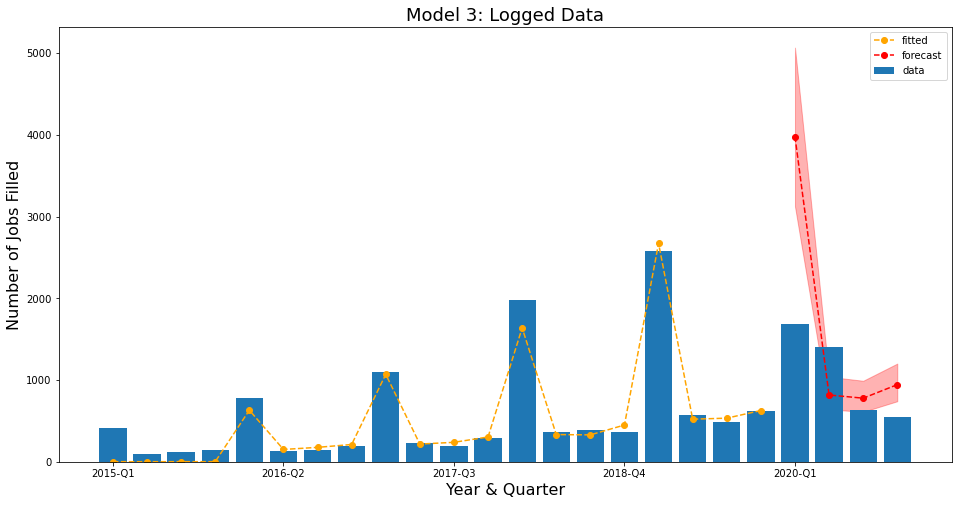

In [37]:
train_pred = model2Log.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(16, 8))
#ax.plot(data.index, data['Jobs Filled'],'--', marker='o', label='data')
ax.bar(data.index, np.exp(data['Log Jobs Filled']), label='data')
ax.plot(train.index, np.exp(train_pred),'--', marker='o', color='orange', label='fitted')
ax.plot(test.index, np.exp(test_pred),'--', marker='o', color='red', label='forecast')
ax.fill_between(test.index, \
                np.exp(confint[:,0]), np.exp(confint[:,1]), \
                color='red', alpha=0.3)
a = ax.get_xticks().tolist()
x = [ data["Year & Quarter"].iloc[int(a[i])] for i in range(0,len(a)-1) ]
ax.set_xticklabels(x)
plt.title("Model 3: Logged Data", fontsize=18)
plt.xlabel("Year & Quarter", fontsize=16)
plt.ylabel("Number of Jobs Filled", fontsize=16)
ax.legend();

In [38]:
print("Train set RMSE:", rmse(np.exp(train['Log Jobs Filled']), np.exp(train_pred)))
print("Old Validation set RMSE:", rmse(np.exp(train['Log Jobs Filled'])[-4:], np.exp(train_pred)[-4:]))
print("Test set RMSE:", rmse(np.exp(test['Log Jobs Filled'])[-4:], np.exp(test_pred)[-4:]))

Train set RMSE: 138.84550946339195
Old Validation set RMSE: 58.88048874635745
Test set RMSE: 1203.2353282875952


In [39]:
pred = int(sum(np.exp(test_pred).round()))
actual = sum(np.exp(test["Log Jobs Filled"]))
print("Predicted number of jobs created in 2020: ", pred )
print("Actual number of jobs created in 2020: ", int(actual) )
print("Model is off by", round(100*(pred - actual) / actual,1), "% of the actual number of jobs created.")

Predicted number of jobs created in 2020:  6518
Actual number of jobs created in 2020:  4273
Model is off by 52.5 % of the actual number of jobs created.


I believe that model 1 performs the best on the data. Model 1 has better performance when it forecasts on 2019. Also when I update model 1 to include the 2019 data, the auto_arima function does not try to change the type of model. Instead only the coefficients change. The updated coeficients also don't change the predictions for 2020 by much.

Model 2 with the logged data appears to have a better fit on the data, but does not perform as well on the validation set. Also, when the 2019 data is included in the training, the auto_arima functions changes the type of SARIMA model. This third model also has much lower predictions for the total number of jobs created in 2020 which creates more doubt about model 2's projections.